# Tutorial 10

Solve the following linear time-varying first-degree ODE using numeric integration methods:
$$
\begin{cases}
y'(t) = -3t y(t)\\
y(0) = 0.5
\end{cases}
$$
The accurate solution is:
$$
y(t) = \frac{1}{2}e^{-\frac{3}{2}t^2}
$$

1. Solve the equation above using Forward Euler's method and the following temporal parameters: $t_{in} = 0s,t_{end} = 10s, h = 0.01s$. Plot the <b>global error</b> err(t) of the numerical solution. 

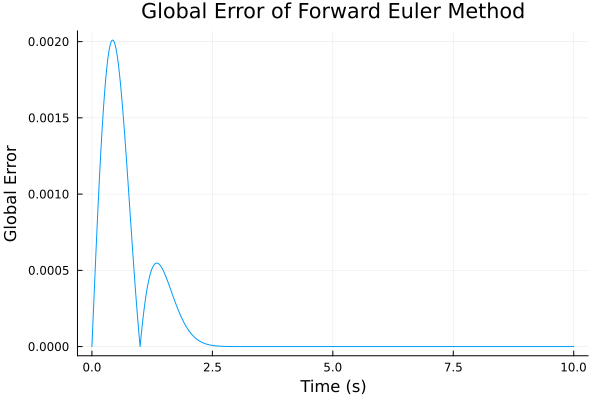

In [3]:
using Plots

function f(t, y)
    return -3 * t * y
end

function forEuler(f, y0, t_in, t_end, h)
    t = range(t_in,t_end,step=h);
    y = [y0];
        
    for i = 2:length(t)
        y_new = y[end]+h*f(t[i-1],y[end]);
        append!(y,y_new)
    end

    return (t,y)
end

function exact_solution(t)
    return 0.5 * exp(-1.5 * t^2)
end

t_in = 0.0
t_end = 10.0
h = 0.01
y0 = 0.5

t, y = forEuler(f, y0, t_in, t_end, h)

y_exact = exact_solution.(t)
global_error = abs.(y .- y_exact)

plot(t, global_error, xlabel="Time (s)", ylabel="Global Error",
     title="Global Error of Forward Euler Method", legend=false)


2. Solve the equation above using Forward Euler's method and the following temporal parameters: $t_{in} = 0s,t_{end} = 10s, h = 0.2s$. Plot the <b>numerical solution</b> y(t), what is happening?

Note: It could be helpful to plot the absolute value $|y(t)|$ in logarithmic scale on the y-axis.

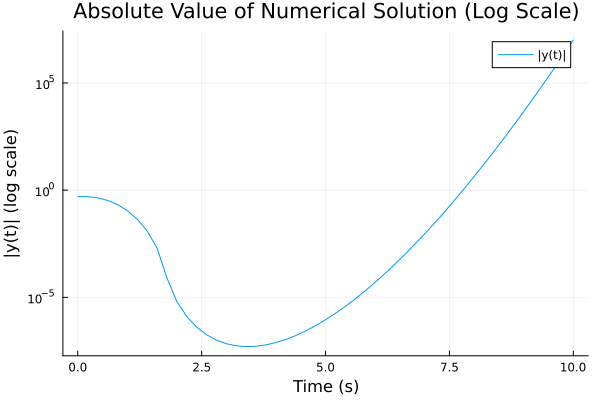

In [11]:
t_in = 0.0
t_end = 10.0
h = 0.2
y0 = 0.5

t, y = forEuler(f, y0, t_in, t_end, h)

plot(t, abs.(y), yscale=:log10, label="|y(t)|", xlabel="Time (s)", ylabel="|y(t)| (log scale)",
title="Absolute Value of Numerical Solution (Log Scale)")
# plot(t, abs.(y), label="|y(t)|", xlabel="Time (s)", ylabel="|y(t)| (log scale)",
# title="Absolute Value of Numerical Solution (Log Scale)")

3. Analyze the stability of the method in this case. What is the maximum value of $t_{end}$ that would make the numerical method stable with $h = 0.2s$?

In [15]:
lambda = 3
t_max = 2/(lambda*h)
println("The maximum stable value of t_end is $t_max seconds.")


The maximum stable value of t_end is 3.333333333333333 seconds.
